<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    THE ANALYSIS OF THE MOBILE PHONE MARKET AT MOBILE CITY STORE
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>


---

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA EXPLORATION
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>


**Người thực hiện**: Nguyễn Hữu Bền

**MSSV**: 22120029

---

## Cài đặt các thư viện cần thiết

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

---

# Khám phá dữ liệu

## Tải bộ dữ liệu đã được xử lí

In [29]:
# Load dữ liệu đã được xử lí từ data
data = pd.read_csv('../data/processed_data.csv', index_col=0)

In [30]:
# Hiển thị ra một số dòng của bộ dữ liệu
data.sample(10)

,ten,loai_dien_thoai,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,duong_dan,mau_sac,gia_moi,gia_cu,he_dieu_hanh,cpu,ram,bo_nho_trong,dung_luong_pin,thiet_ke,hang_dien_thoai,la_dien_thoai_cu,kich_thuoc_man_hinh,tan_so_quet,do_sang_man_hinh,loai_man_hinh,so_the_sim,loai_pin,cong_suat_sac,do_phan_giai_cam_sau,do_phan_giai_cam_truoc
4456,Điện thoại OPPO A5s (MediaTek MT6765 Helio P35),OPPO,12.0,5.0,0,https://mobilecity.vn/dien-thoai/oppo-a5s-medi...,Đen,NaN,NaN,Android 8,Mediatek MT6765 Helio P35 (12nm)\r\n8 nhân (4x...,3.0,64.0,4230.0,Thanh + Cảm ứng,Oppo,False,6.20,NaN,NaN,LCD,2,Li-Ion,NaN,"[13.0, 2.0]",[8.0]
1495,Điện thoại Xiaomi POCO X6 Neo 5G (Dimensity 6080),POCO,12.0,5.0,0,https://mobilecity.vn/dien-thoai/xiaomi-poco-x...,Xanh Chân Trời,5350000.0,4990000.0,Android 13,Mediatek Dimensity 6080 (6 nm)\r\n8 nhân (2x2....,12.0,256.0,5000.0,"Vuông vức\r\nKhung nhựa, mặt lưng nhựa\r\nKhán...",Xiaomi,False,6.67,120.0,1000.0,OLED,2,Li-Po,33.0,"[108.0, 2.0]",[16.0]
841,Điện thoại Tecno Spark 30C (Helio G81),Tecno,12.0,5.0,5,https://mobilecity.vn/dien-thoai/tecno-spark-3...,Đen,2450000.0,NaN,Android 14,MediaTek Helio G81\r\n8 nhân (2x2.0 GHz & 6x1....,6.0,128.0,5000.0,Khung nhựa vuông vức\r\nMặt lưng nhựa phẳng\r\...,Tecno,False,6.67,120.0,NaN,LCD,2,NaN,18.0,[50.0],[8.0]
385,Điện thoại Samsung Galaxy S21 Ultra Cũ 5G (Hàn...,Samsung Cũ,6.0,5.0,97,https://mobilecity.vn/dien-thoai/samsung-galax...,Xám,7850000.0,10450000.0,Android 11,1. Quốc tế:\r\nExynos 2100 (5 nm)\r\n8 nhân (1...,12.0,256.0,5000.0,Khung kim loại + 2 Mặt kính Gorilla Victus\r\n...,Samsung,True,6.80,120.0,1500.0,AMOLED,2,Li-Ion,25.0,"[108.0, 10.0, 10.0, 12.0]",[40.0]
5380,Điện thoại Samsung Galaxy A25 5G (Exynos 1280),Samsung Chính hãng,12.0,5.0,0,https://mobilecity.vn/dien-thoai/samsung-galax...,NaN,NaN,NaN,Android 14,Exynos 1280 (5 nm)\r\n8 nhân (2x2.4 GHz & 6x2....,6.0,NaN,5000.0,"Khung nhựa, mặt lưng nhựa",Samsung,False,6.44,90.0,1000.0,AMOLED,2,Li-Po,25.0,"[50.0, 5.0, 2.0]",[13.0]
6257,Điện thoại Samsung Galaxy S10 Cũ (Hàn Quốc - L...,Samsung Cũ,6.0,5.0,404,https://mobilecity.vn/samsung/samsung-galaxy-s...,Cam,3950000.0,4450000.0,Android 9,Exynos 9820: 8 nhân (2x2.73 GHz & 2x2.31 GHz &...,8.0,128.0,3400.0,Thanh + Cảm ứng,Samsung,True,6.10,NaN,NaN,AMOLED,2,Li-Ion,15.0,"[12.0, 12.0, 16.0]",[10.0]
5517,Điện thoại Samsung Galaxy M23 5G (Chính hãng),Samsung Chính hãng,12.0,5.0,3,https://mobilecity.vn/dien-thoai/samsung-galax...,Xanh nhạt,NaN,NaN,Android 12,Qualcomm Snapdragon 750G 5G (8 nm)\r\n8 nhân (...,4.0,128.0,5000.0,Thanh + Cảm ứng,Samsung,False,6.60,120.0,NaN,LCD,2,Li-Po,25.0,"[50.0, 8.0, 2.0]",[8.0]
6905,Điện thoại iPhone 12 cũ (Chính hãng) - Giảm gi...,iPhone Cũ 99%,6.0,5.0,92,https://mobilecity.vn/apple/iphone-12-cu.html,Tím,8350000.0,9950000.0,iOS 14,Apple A14 Bionic (5 nm)\r\n6 nhân (2x3.1 GHz +...,4.0,256.0,2815.0,Khung nhôm vuông vức\r\nKính sau Corning-made ...,iPhone,True,6.10,NaN,625.0,OLED,2,Li-Ion,15.0,"[12.0, 12.0]",[12.0]
5403,Điện thoại Gionee K10,Gionee,12.0,5.0,0,https://mobilecity.vn/dien-thoai/gionee-k10.html,Đen,NaN,NaN,Android 10,Unisoc Tiger T310 SoC (12nm)\r\n4 nhân (4x2.0 ...,4.0,64.0,4800.0,Thanh + Cảm ứng,Gionee,False,6.80,60.0,NaN,LCD,2,Li-Po,10.0,"[13.0, 5.0, 2.0]",[5.0]
2940,Điện thoại Xiaomi POCO F7 Ultra (Snapdragon 8 ...,POCO,18.0,5.0,1,https://mobilecity.vn/dien-thoai/xiaomi-poco-f...,NaN,12950000.0,NaN,Android 15,Qualcomm SM8650-AB Snapdragon 8 Gen 3 (4 nm)\r...,12.0,NaN,6500.0,NaN,Xiaomi,False,6.67,120.0,NaN,AMOLED,1,NaN,120.0,"[50.0, 32.0, 8.0]",[32.0]


## Có bao nhiêu dòng và cột trong bộ dữ liệu?

In [31]:
## Xem số dòng và cột của bộ dữ liệu
nrows, ncols = data.shape
print(f"Dataset has {nrows} rows and {ncols} columns")

## Đánh giá bộ dữ liệu:
if nrows >= 1000 and ncols >= 10:
    print("Data is good!")
else:
    print("Data is not good!")

Dataset has 8662 rows and 26 columns
Data is good!


## Mỗi dòng có ý nghĩa gì? Có quan trọng không khi mỗi dòng có ý nghĩa khác nhau?

- Mỗi dòng đại diện cho một mẫu điện thoại di động với các thông số kỹ thuật và thông tin khác nhau, các thuộc tính giúp hiểu rõ hơn về đặc điểm, cấu hình và giá trị của từng mẫu điện thoại.
- Rất quan trọng! Vì bộ dữ liệu này chứa thông tin về nhiều mẫu điện thoại khác nhau, mỗi dòng cần phải có các giá trị đúng và phản ánh chính xác từng mẫu điện thoại. Nếu các dòng có ý nghĩa khác nhau hoặc không đồng nhất, dữ liệu sẽ trở nên khó hiểu và không chính xác, ảnh hưởng đến các phân tích và kết luận bạn có thể rút ra từ dữ liệu.

### Có dòng dữ liệu nào bị trùng không?

In [7]:
## Xem có dòng nào của dữ liệu bị trùng không?
num_duplicates = data.duplicated().sum()
if num_duplicates == 0:
    print("No duplicates found")
else:
    print(f"Found {num_duplicates} duplicates")
    # Xóa các dòng trùng lặp
    data = data.drop_duplicates()

No duplicates found


## Các cột (thuộc tín) có ý nghĩa như thế nào?

| **Thuộc tính**               | **Ý nghĩa**                                                                                       |
|-----------------------------|--------------------------------------------------------------------------------------------------|
| `ten`                        | Tên của điện thoại (mẫu điện thoại)                                                              |
| `loai_dien_thoai`            | Loại điện thoại (ví dụ: Smartphone, Feature Phone, v.v.)                                         |
| `thoi_gian_bao_hanh`         | Thời gian bảo hành của điện thoại (thường tính bằng tháng hoặc năm)                             |
| `danh_gia`                   | Đánh giá trung bình của người dùng cho sản phẩm (thường là điểm từ 1 đến 5)                     |
| `so_luong_binh_luan`         | Số lượng bình luận hoặc đánh giá mà sản phẩm nhận được từ người dùng                           |
| `duong_dan`                  | Đường dẫn URL đến hình ảnh hoặc trang sản phẩm trên website                                      |
| `mau_sac`                    | Màu sắc của điện thoại (ví dụ: Đen, Trắng, Vàng, v.v.)                                          |
| `gia_moi`                    | Giá mới của điện thoại (giá bán lẻ hiện tại)                                                     |
| `gia_cu`                     | Giá cũ của điện thoại (nếu có, thường là giá bán ban đầu hoặc giá khuyến mãi trước đây)        |
| `he_dieu_hanh`               | Hệ điều hành mà điện thoại sử dụng (ví dụ: Android, iOS, v.v.)                                  |
| `cpu`                        | Bộ vi xử lý (CPU) của điện thoại (ví dụ: Snapdragon, Apple A-series, v.v.)                       |
| `ram`                        | Bộ nhớ RAM của điện thoại (đơn vị tính là GB)                                                    |
| `bo_nho_trong`               | Bộ nhớ trong của điện thoại (đơn vị tính là GB)                                                  |
| `dung_luong_pin`             | Dung lượng pin của điện thoại (thường tính bằng mAh - miliampere giờ)                           |
| `thiet_ke`                   | Thiết kế của điện thoại (ví dụ: kiểu dáng, chất liệu, thiết kế mỏng nhẹ, v.v.)                  |
| `hang_dien_thoai`            | Thương hiệu hoặc nhà sản xuất điện thoại (ví dụ: Samsung, Apple, Xiaomi, v.v.)                   |
| `la_dien_thoai_cu`           | Liệu điện thoại là hàng cũ hay không (1: có, 0: không)                                           |
| `kich_thuoc_man_hinh`        | Kích thước màn hình của điện thoại (đơn vị tính là inch)                                         |
| `tan_so_quet`                | Tần số quét màn hình (hertz, ví dụ: 60Hz, 120Hz, v.v.)                                            |
| `do_sang_man_hinh`           | Độ sáng tối đa của màn hình (thường tính bằng nits)                                              |
| `loai_man_hinh`              | Loại màn hình của điện thoại (ví dụ: AMOLED, LCD, v.v.)                                          |
| `so_the_sim`                 | Số lượng khe SIM hỗ trợ (ví dụ: 1 SIM, 2 SIM)                                                    |
| `loai_pin`                   | Loại pin của điện thoại (ví dụ: Li-ion, Li-polymer, v.v.)                                         |
| `cong_suat_sac`              | Công suất sạc tối đa của điện thoại (thường tính bằng W - watt)                                 |
| `do_phan_giai_cam_sau`       | Độ phân giải của camera sau (đơn vị tính là megapixels - MP)                                     |
| `do_phan_giai_cam_truoc`     | Độ phân giải của camera trước (đơn vị tính là megapixels - MP)                                   |



## Có cột nào bị thiếu dữ liệu không?

In [43]:
# Kiểm tra % các giá trị bị thiếu trong mỗi cột
def missing_ratio(df):
    missing_values = df.isnull().sum()
    missing_ratio = (missing_values / df.shape[0]) * 100
    return missing_ratio

missing_values = missing_ratio(data)
missing_values

ten                        0.000000
loai_dien_thoai            0.000000
thoi_gian_bao_hanh         0.000000
danh_gia                   0.000000
so_luong_binh_luan         0.000000
duong_dan                  0.000000
mau_sac                    3.301778
gia_moi                   17.478642
gia_cu                    41.318402
he_dieu_hanh               0.000000
cpu                        0.173170
ram                        0.184715
bo_nho_trong               3.463403
dung_luong_pin             2.308936
thiet_ke                   1.339183
hang_dien_thoai            0.000000
la_dien_thoai_cu           0.000000
kich_thuoc_man_hinh        3.890556
tan_so_quet               24.255368
do_sang_man_hinh          40.163934
loai_man_hinh              3.809744
so_the_sim                 0.000000
loai_pin                  24.139921
cong_suat_sac              5.645347
do_phan_giai_cam_sau       0.000000
do_phan_giai_cam_truoc     0.000000
dtype: float64

## Mỗi cột hiện tại có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu không phù hợp cho việc xử lý tiếp theo không?

In [32]:
## Kiểm tra kiểu dữ liệu của các cột
dtype_df = data.dtypes

# In ra kiểu dữ liệu của các cột
print(dtype_df)

ten                        object
loai_dien_thoai            object
thoi_gian_bao_hanh        float64
danh_gia                  float64
so_luong_binh_luan          int64
duong_dan                  object
mau_sac                    object
gia_moi                   float64
gia_cu                    float64
he_dieu_hanh               object
cpu                        object
ram                       float64
bo_nho_trong              float64
dung_luong_pin            float64
thiet_ke                   object
hang_dien_thoai            object
la_dien_thoai_cu             bool
kich_thuoc_man_hinh       float64
tan_so_quet               float64
do_sang_man_hinh          float64
loai_man_hinh              object
so_the_sim                  int64
loai_pin                   object
cong_suat_sac             float64
do_phan_giai_cam_sau       object
do_phan_giai_cam_truoc     object
dtype: object


- Chuyển một số thuộc tính thuộc dạng phân loại đang có kiểu dữ liệu là 'object' sang dạng 'category'

In [34]:
# Chuyển cột đang có dữ liệu là 'object' sang categorical
data['mau_sac'] = data['mau_sac'].astype('category')
data['he_dieu_hanh'] = data['he_dieu_hanh'].astype('category')
data['cpu'] = data['cpu'].astype('category')
data['thiet_ke'] = data['thiet_ke'].astype('category')
data['hang_dien_thoai'] = data['hang_dien_thoai'].astype('category')
data['loai_man_hinh'] = data['loai_man_hinh'].astype('category')
data['loai_pin'] = data['loai_pin'].astype('category')
data['la_dien_thoai_cu'] = data['la_dien_thoai_cu'].astype('category')

In [35]:
# Kiểm tra lại kiểu dữ liệu của các cột
dtype_df = data.dtypes
print(dtype_df)

ten                         object
loai_dien_thoai             object
thoi_gian_bao_hanh         float64
danh_gia                   float64
so_luong_binh_luan           int64
duong_dan                   object
mau_sac                   category
gia_moi                    float64
gia_cu                     float64
he_dieu_hanh              category
cpu                       category
ram                        float64
bo_nho_trong               float64
dung_luong_pin             float64
thiet_ke                  category
hang_dien_thoai           category
la_dien_thoai_cu          category
kich_thuoc_man_hinh        float64
tan_so_quet                float64
do_sang_man_hinh           float64
loai_man_hinh             category
so_the_sim                   int64
loai_pin                  category
cong_suat_sac              float64
do_phan_giai_cam_sau        object
do_phan_giai_cam_truoc      object
dtype: object


In [45]:
## Nếu một trong những cột có missing_ratio > 50% thì xóa cột đó
columns_to_drop = missing_values[missing_values > 50].index
data = data.drop(columns=columns_to_drop)

## Đối với kiểu dữ liệu dạng numeric, dữ liệu được phân bố như thế nào?

In [37]:
# Define funtion to calculate statistics for numerical columns
# missing_ratio: the percentage of missing values
def missing_ratio(series: pd.Series) -> float:
    return series.isna().mean() * 100
# lower_quartile:
def lower_quartile(series: pd.Series) -> float:
    return series.quantile(0.25)
# median:
def median(series: pd.Series) -> float:
    return series.quantile(0.5)
# upper_quartile:
def upper_quartile(series: pd.Series) -> float:
    return series.quantile(0.75)

# calculate statistics for numerical columns and save the results to a DataFrame
num_col_info_df = data.select_dtypes(exclude=['category', 'object']).agg(
    [missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max'])

# rename the index of the DataFrame
num_col_info_df.index = ['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max']

# round the values to 1 decimal place
num_col_info_df = num_col_info_df.round(1)

# TEST
num_col_info_df

,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,gia_moi,gia_cu,ram,bo_nho_trong,dung_luong_pin,kich_thuoc_man_hinh,tan_so_quet,do_sang_man_hinh,so_the_sim,cong_suat_sac
missing_ratio,0.0,0.0,0.0,17.5,41.3,0.2,3.5,2.3,3.9,24.3,40.2,0.0,5.6
min,0.0,4.0,0.0,100000.0,825000.0,0.8,16.0,4.5,3.5,60.0,400.0,1.0,1.0
lower_quartile,6.0,5.0,0.0,4750000.0,5450000.0,6.0,128.0,4500.0,6.5,120.0,800.0,2.0,25.0
median,12.0,5.0,7.0,7550000.0,8450000.0,8.0,256.0,5000.0,6.7,120.0,1200.0,2.0,45.0
upper_quartile,12.0,5.0,67.0,13450000.0,13950000.0,12.0,256.0,5000.0,6.7,120.0,1500.0,2.0,80.0
max,30.0,5.0,5490.0,51250000.0,68000000.0,24.0,1024.0,15500.0,8.7,240.0,6000.0,2.0,240.0


## Đối với kiểu dữ liệu dạng 'category', dữ liệu được phân bố như thế nào?

In [40]:
# Tìm missing_ratio
def missing_ratio(col):
    return col.isna().mean() * 100

# Tìm num_values
def num_values(col):
    return col.nunique()

# Tìm value_ratios
def value_ratios(col):
    return (col.value_counts(normalize=True, ascending=False) * 100).round(1).to_dict()

# Tìm missing_ratio, num_values, value_ratios của data
cat_col_info_df = data.select_dtypes(include=['category']).agg([missing_ratio, num_values, value_ratios]).round(1)
cat_col_info_df.index = ['missing_ratio', 'num_values', 'value_ratios']

cat_col_info_df

,mau_sac,he_dieu_hanh,cpu,thiet_ke,hang_dien_thoai,la_dien_thoai_cu,loai_man_hinh,loai_pin
missing_ratio,3.301778,0.0,0.17317,1.339183,0.0,0.0,3.809744,24.139921
num_values,472,23,694,658,55,2,3,3
value_ratios,"{'Đen': 22.9, 'Xanh': 13.4, 'Trắng': 13.0, 'Tí...","{'Android 13': 19.9, 'Android 14': 19.0, 'Andr...",{'Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm) ...,"{'Thanh + Cảm ứng': 21.6, 'Thanh + cảm ứng': 2...","{'Xiaomi': 27.6, 'Samsung': 14.3, 'Vivo': 13.5...","{False: 79.0, True: 21.0}","{'AMOLED': 57.0, 'OLED': 21.7, 'LCD': 21.3}","{'Li-Po': 72.0, 'Li-Ion': 24.3, 'Si/C': 3.8}"


## Khám phá dữ liệu (tiếp theo)

### Màu sắc

In [66]:
# Đối với điện thoại không có màu sắc thì ta sẽ điền giá trị là 'Không có'
data['mau_sac'] = data['mau_sac'].cat.add_categories('Không có').fillna('Không có')

In [67]:
# Kiểm tra xem cột màu sắc còn bị thiếu giá trị không?
data['mau_sac'].isnull().sum()

0

In [69]:
# Xem tất cả các giá trị của cột màu sắc
n_colors = data['mau_sac'].nunique()
print(f"Number of colors: {n_colors}")
data['mau_sac'].value_counts()

Number of colors: 473


mau_sac
Đen                           1920
Xanh                          1124
Trắng                         1086
Tím                            385
Vàng                           287
Không có                       286
Xanh dương                     260
Xám                            257
Bạc                            233
Đỏ                             216
Hồng                           179
Cam                            143
Xanh lá                        135
Xanh ngọc                       71
Xanh bạc hà                     63
Xanh Dương                      53
Gold                            33
xanh                            31
Xanh Bạc Hà                     27
Nâu                             27
Đen trong                       24
Xanh Ngọc                       24
Titan Đen                       23
Xanh Đậm                        23
Vàng Đồng                       23
Đồng                            23
Titanium                        22
Xanh Navy                       22
Titan       

In [74]:
# Biển đổi dữ liệu cột 'mau_sac', chỉ lấy từ đầu tiên làm màu đại diện 
data['mau_sac'] = data['mau_sac'].str.split(' ').str[0]

# Viết thường tất cả các giá trị của cột 'mau_sac'
data['mau_sac'] = data['mau_sac'].str.lower()

# In ra số màu sắc khác nhau
n_colors = data['mau_sac'].nunique()
print(f"Number of colors: {n_colors}")

Number of colors: 78


In [75]:
# In ra các màu sắc khác nhau
data['mau_sac'].value_counts()

mau_sac
xanh            2354
đen             2197
trắng           1208
tím              464
vàng             405
xám              335
không            286
bạc              267
đỏ               250
hồng             210
cam              168
titan            146
gold              33
nâu               30
titanium          26
đồng              24
cầu               17
trong             17
blue              16
kem               15
ngọc              12
green             12
red               11
silver             8
sierra             7
black              7
aurora             6
midnight           6
be                 5
starlight          5
ánh                5
bản                5
xanh-tím           5
electric           4
jupiter            4
white              4
dream              4
ice                4
interstellar       4
đêm                4
pink               3
vang               3
disney             3
xanh-trắng         3
navy               3
glacier            3
xam                3
viole

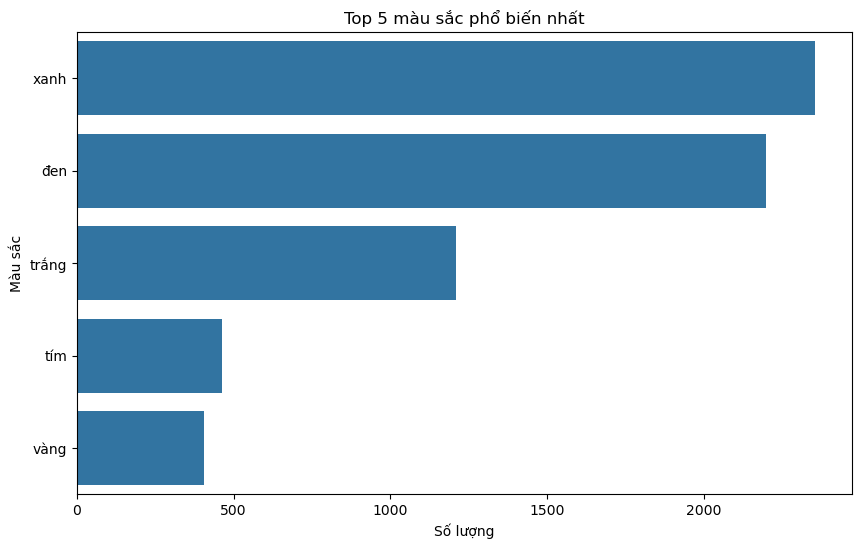

In [76]:
# Vẽ biểu đồ thể hiện top 5 màu sắc phổ biến nhất
plt.figure(figsize=(10, 6))
sns.countplot(y='mau_sac', data=data, order=data['mau_sac'].value_counts().iloc[:5].index)
plt.title('Top 5 màu sắc phổ biến nhất')
plt.xlabel('Số lượng')
plt.ylabel('Màu sắc')
plt.show()

## Giá mới, giá cũ

In [50]:
# Nếu có giá mới mà không có giá cũ thì giá trị của cả 2 cột là bằng nhau
data['gia_cu'] = data['gia_cu'].fillna(data['gia_moi'])

data['gia_moi'] = data['gia_moi'].fillna(data['gia_cu'])

# Đối với các cột còn lại, ta sẽ điền giá trị bằng -1
data['gia_cu'] = data['gia_cu'].fillna(-1)
data['gia_moi'] = data['gia_moi'].fillna(-1)

# Kiểm tra lại missing values
missing_values_1 = data['gia_cu'].isnull().sum()
missing_values_2 = data['gia_moi'].isnull().sum()

print(f"Missing values in 'gia_cu': {missing_values_1}")
print(f"Missing values in 'gia_moi': {missing_values_2}")

Missing values in 'gia_cu': 0
Missing values in 'gia_moi': 0


### Số lượng điện thoại khi xem xét theo giá

- Nghĩa là những chiếc điện thoại nếu có giá mới nhỏ hơn giá cũ thì đang khuyến mãi, nếu có giá là -1 thì có nghĩa là giá cả trao đổi.

In [52]:
# Đếm số lượng điện thoại
phone_count = data['gia_moi'].value_counts()

# Đếm số lượng điện thoại đang khuyến mãi
discounted_phone_count = data[data['gia_cu'] > data['gia_moi']]['gia_cu'].value_counts()

# Đếm số lượng điện thoại có giá trao đổi hoặc ngừng kinh doanh
negotiable_phone_count = data[data['gia_cu'] == -1]['gia_cu'].value_counts()

# In ra số lượng điện thoại
print(f"Total number of phones: {phone_count.sum()}")
print(f"Number of discounted phones: {discounted_phone_count.sum()}")
print(f"Number of negotiable phones: {negotiable_phone_count.sum()}")

Total number of phones: 8662
Number of discounted phones: 4147
Number of negotiable phones: 1353


### Có bao nhiêu điện thoại cũ, bao nhiêu điện thoại mới trong bộ dữ liệu?

In [54]:
# Đếm số lượng điện thoại mới
new_phone_count = data[data['la_dien_thoai_cu'] == 0]['la_dien_thoai_cu'].value_counts()

# In ra số lượng điện thoại
print(f"Number of new phones: {new_phone_count.sum()}")

Number of new phones: 0


## Số lượng điện thoại trong bộ dữ liệu nếu phân theo hãng

- Xem giá trị trong hãng điện thoại có bị thiếu không?

In [55]:

# Kiểm tra xem có giá trị bị thiếu trong cột 'hang_dien_thoai' không
missing_values = data['hang_dien_thoai'].isnull().sum()
if missing_values == 0:
    print("No missing values found")
else:
    print(f"Found {missing_values} missing values")

No missing values found


In [58]:
# Định dạng lại cột 'hang_dien_thoai'
data['hang_dien_thoai'] = data['hang_dien_thoai'].str.replace(' ', '_').str.lower()

# Viết hoa chữ cái đầu tiên của mỗi từ trong cột 'hang_dien_thoai'
data['hang_dien_thoai'] = data['hang_dien_thoai'].str.title()

In [61]:
# In ra số lượng các hãng điện thoại
phone_brands = data['hang_dien_thoai'].nunique()
print(f"Number of phone brands: {phone_brands}")

Number of phone brands: 53


In [59]:
# In ra các giá trị của cột 'hang_dien_thoai' và giá trị của mỗi loại
brand_counts = data['hang_dien_thoai'].value_counts()
print(brand_counts)

hang_dien_thoai
Xiaomi        2392
Samsung       1239
Vivo          1166
Realme         804
Iphone         786
Oppo           504
Oneplus        234
Tecno          220
Honor          187
Nubia          156
Google         125
Asus           109
Zte            105
Sony            93
Motorola        92
Meizu           61
Vsmart          59
Huawei          45
Nothing         34
Nokia           32
Lg              32
Lenovo          23
Nio             21
Infinix         18
Gionee          15
Leeco           11
Sky             11
Blackberry      10
Htc              9
Bphone           8
Arbutus          7
Itel             6
Ulefone          5
Unihertz         5
Thành_Hưng       4
360              4
Blackview        4
Poco             4
Philips          3
Fairphone        3
Sugar            2
Micromax         2
Red              2
Moondrop         1
Meiigoo          1
Freetel          1
Pepsi            1
Vertu            1
Sol              1
Blu              1
Kashi            1
Leica          

In [65]:
# Đối với các giá trị có số lượng ít hơn 10, ta sẽ gộp chúng lại thành một giá trị 'Other'
threshold = 10
data['hang_dien_thoai'] = data['hang_dien_thoai'].apply(lambda x: x if brand_counts[x] >= threshold else 'Other')

# In ra số lượng các hãng điện thoại sau khi gộp
phone_brands = data['hang_dien_thoai'].nunique()
print(f"Number of phone brands after merging: {phone_brands}")

KeyError: 'Other'

- Trực quan hóa

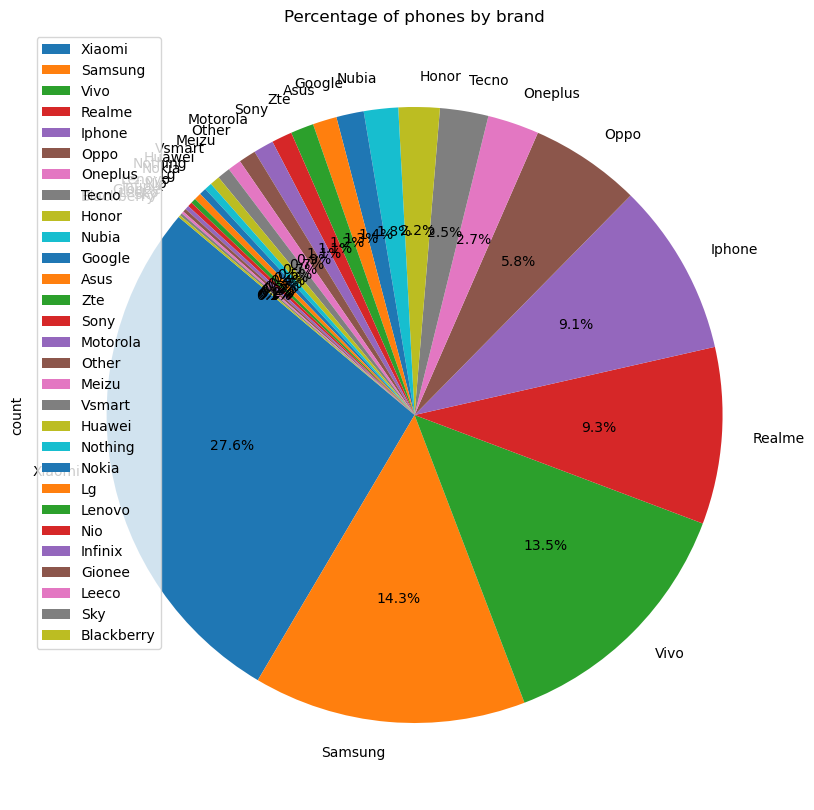

In [64]:
# Vẽ biểu đồ tròn in ra số lượng điện thoại của mỗi hãng
plt.figure(figsize=(10, 10))
data['hang_dien_thoai'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Percentage of phones by brand')

# Hiển thị chú thích
plt.legend()
plt.show()

### CPU

In [77]:
# In ra số giá trị khác nhau của cột 'cpu' và số lượng của mỗi giá trị
n_cpus = data['cpu'].nunique()
print(f"Number of CPUs: {n_cpus}")
print(data['cpu'].value_counts())

Number of CPUs: 694
cpu
Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm)\r\n8 nhân (1x3.19 GHz & 3x2.75 GHz & 4x1.80 GHz)\r\nGPU: Adreno 730                                                                                                                                    231
Qualcomm SM8450 Snapdragon 8 Gen 1 (4 nm)\r\n8 nhân (1x3.00 GHz & 3x2.50 GHz & 4x1.80 GHz)\r\nGPU: Adreno 730                                                                                                                                     205
Qualcomm SM8550-AB Snapdragon 8 Gen 2 (4 nm)\r\n8 nhân (1x3.2 GHz & 2x2.8 GHz & 2x2.8 GHz & 3x2.0 GHz)\r\nGPU: Adreno 740                                                                                                                         190
Qualcomm SM8550 Snapdragon 8 Gen 2 (4 nm)\r\n8 nhân (1x3.2 GHz & 2x2.8 GHz & 2x2.8 GHz & 3x2.0 GHz)\r\nGPU: Adreno 740                                                                                                                        

### RAM

In [78]:
# In ra số giá trị khác nhau của cột 'ram' và số lượng của mỗi giá trị
n_rams = data['ram'].nunique()
print(f"Number of RAMs: {n_rams}")
print(data['ram'].value_counts())

Number of RAMs: 12
ram
8.00     3096
12.00    2124
6.00     1301
4.00      994
16.00     713
3.00      262
2.00       96
24.00      38
1.00       15
15.00       4
18.00       2
0.75        1
Name: count, dtype: int64


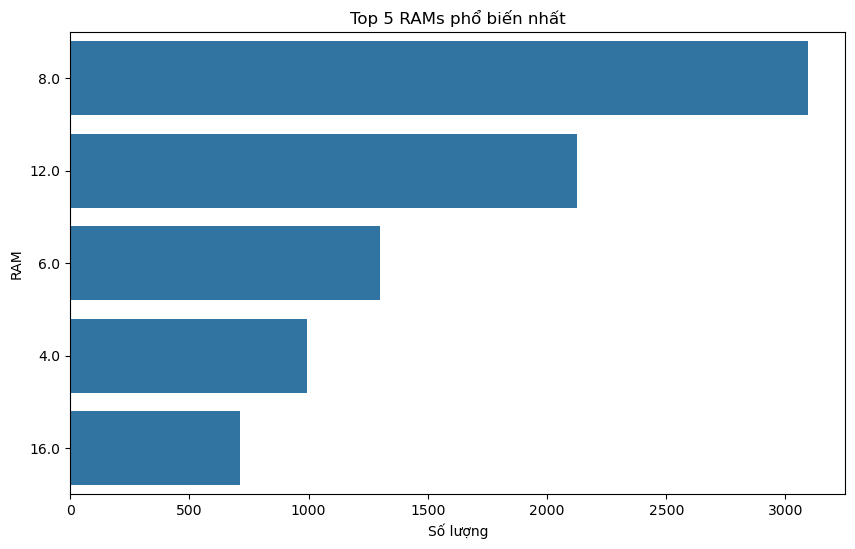

In [80]:
# Vẽ biểu đồ số RAM phổ biến nhất (top 5)
plt.figure(figsize=(10, 6))
sns.countplot(y='ram', data=data, order=data['ram'].value_counts().iloc[:5].index)
plt.title('Top 5 RAMs phổ biến nhất')
plt.xlabel('Số lượng')
plt.ylabel('RAM')
plt.show()

### Loại Pin

In [86]:
# In ra số lượng Nan
missing_values = data['loai_pin'].isnull().sum() 
if missing_values == 0:
    print("No missing values found")
else:
    print(f"Found {missing_values} missing values")

# Thêm giá trị 'Không xác định' vào các kiểu pin
data['loai_pin'] = data['loai_pin'].cat.add_categories('Không xác định')

# Đối với các kiểu pin bị thiếu giá trị, ta sẽ điền giá trị là 'Không xác định'
data['loai_pin'] = data['loai_pin'].fillna('Không xác định')

# Xem số lượng các giá trị khác nhau của cột 'pin' và số lượng của mỗi giá trị
n_pins = data['loai_pin'].nunique()
print(f"Number of batteries: {n_pins}")
print(data['loai_pin'].value_counts())

Found 2091 missing values
Number of batteries: 4
loai_pin
Li-Po             4728
Không xác định    2091
Li-Ion            1596
Si/C               247
Name: count, dtype: int64


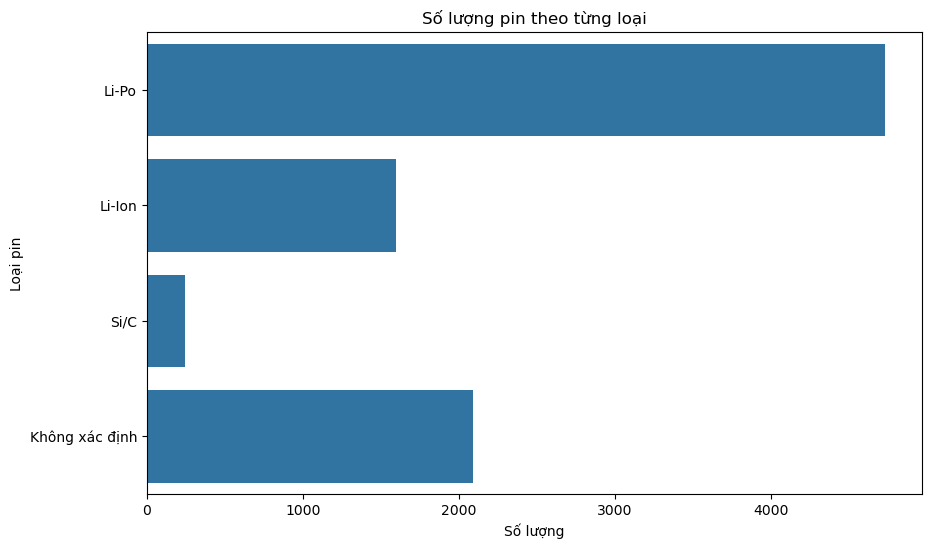

In [89]:
# Trừ loại pin 'Không xác định', ta sẽ trực quan hóa số lượng pin theo từng loại pin
plt.figure(figsize=(10, 6))
sns.countplot(y='loai_pin', data=data, order=data[data['loai_pin'] != 'Không xác định']['loai_pin'].value_counts().index)
plt.title('Số lượng pin theo từng loại')
plt.xlabel('Số lượng')
plt.ylabel('Loại pin')
plt.show()